# Generate FWE Corrected R-Squared Map 
- Using maximum statistic correction
- Notes on controlling a regression:
    - Adding covariates to a regression will 'control' for them, but will almost always increase the R-squared. 
    - To 'remove' a covariate from the regression, you will want to regress a nuisance covariate OUT of the covariate of interest. 
        - This means your regressor will become the residuals from the regression of cov_1 ~ nuisance_cov1

Import Niftis
- These are EXPECTED to have subject IDs which are IDENTICAL to the subject IDs that go in the covarite DF column names below
- Column labels are subject IDs. 
- This is expected to ultimately have the form:

|        |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 |  10 | ... |  40 |  41 |  42 |  43 |  45 |  46 |  47 |  48 |  49 |  50 |
|----------|------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|------------|-----|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| Voxel 1     | 3          | 4         | 7         | 2         | 2         | 2         | 9         | 4         | 7         | 5          | ... | 5           | 2           | 7           | 7           | 3           | 8           | 8           | 1           | 1           | 3           |
| . . .      | ...         | ...        | ...         | ...         | ...         | ...         | ...         | ...         | ...         | ...          | ... | ...           | ...           | ...           | ...           | ...           | ...           | 7           | ...           | ...           | ...           |
| Voxel N     | 2          | 1         | 0         | 1         | 3         | 4         | 9         | 5         | 8         | 6          | ... | 6           | 3           | 8           | 8           | 4           | 9           | 9           | 2           | 2           | 4           |

In [245]:
import_path = '/Volumes/Expansion/datasets/GRAFMAN_TBI_MULTIFOCAL/grafman_fc'
file_target = '*/connectivity/*t_conn.nii*'

In [246]:
from calvin_utils.file_utils.import_functions import GiiNiiFileImport
giinii = GiiNiiFileImport(import_path=import_path, file_column=None, file_pattern=file_target)
nimg_df = giinii.run()
nimg_df

Attempting to import from: /Volumes/Expansion/datasets/GRAFMAN_TBI_MULTIFOCAL/grafman_fc/*/connectivity/*t_conn.nii*


,sub-1055_tome-yeo1000udil_space-2mm_stat-t_conn.nii.gz,sub-1561_tome-yeo1000udil_space-2mm_stat-t_conn.nii.gz,sub-1187_tome-yeo1000udil_space-2mm_stat-t_conn.nii.gz,sub-2068_tome-yeo1000udil_space-2mm_stat-t_conn.nii.gz,sub-2332_tome-yeo1000udil_space-2mm_stat-t_conn.nii.gz,sub-0230_tome-yeo1000udil_space-2mm_stat-t_conn.nii.gz,sub-1711_tome-yeo1000udil_space-2mm_stat-t_conn.nii.gz,sub-3092_tome-yeo1000udil_space-2mm_stat-t_conn.nii.gz,sub-1423_tome-yeo1000udil_space-2mm_stat-t_conn.nii.gz,sub-2132_tome-yeo1000udil_space-2mm_stat-t_conn.nii.gz,...,sub-2116_tome-yeo1000udil_space-2mm_stat-t_conn.nii.gz,sub-0257_tome-yeo1000udil_space-2mm_stat-t_conn.nii.gz,sub-3054_tome-yeo1000udil_space-2mm_stat-t_conn.nii.gz,sub-1662_tome-yeo1000udil_space-2mm_stat-t_conn.nii.gz,sub-0012_tome-yeo1000udil_space-2mm_stat-t_conn.nii.gz,sub-1235_tome-yeo1000udil_space-2mm_stat-t_conn.nii.gz,sub-1356_tome-yeo1000udil_space-2mm_stat-t_conn.nii.gz,sub-0267_tome-yeo1000udil_space-2mm_stat-t_conn.nii.gz,sub-2480_tome-yeo1000udil_space-2mm_stat-t_conn.nii.gz,sub-1510_tome-yeo1000udil_space-2mm_stat-t_conn.nii.gz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Fix names

In [247]:
pre = 'sub-'
post = '_tome-'

In [248]:
nimg_df = GiiNiiFileImport.splice_colnames(nimg_df, pre, post)
nimg_df

,1055,1561,1187,2068,2332,0230,1711,3092,1423,2132,...,2116,0257,3054,1662,0012,1235,1356,0267,2480,1510
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Import Covariates

**The CSV is expected to be in this format**
- sub column contents MUST match the names of the neuroimaging files above. 
    - ID column 
```
+-----+----------------------------+--------------+--------------+--------------+
| sub | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

In [249]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Volumes/Expansion/datasets/GRAFMAN_TBI_MULTIFOCAL/metadata/mmse_scores.csv'
sheet= None

In [250]:
# Specify where you want to save your results to
out_dir = '/Volumes/Expansion/datasets/GRAFMAN_TBI_MULTIFOCAL/rho_maps/mmse_5'

In [251]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()

,subject,mmse1,mmse2,mmse3,mmse4,mmse5,mmse6,mmse7,mmse8,mmse9,mmse10,mmse11,mmse12
0,4,5.0,5.0,3.0,5.0,3.0,2.0,1.0,3.0,1.0,1.0,1.0,30.0
1,5,5.0,4.0,3.0,5.0,2.0,2.0,1.0,3.0,1.0,1.0,1.0,28.0
2,10,5.0,5.0,3.0,5.0,1.0,2.0,1.0,3.0,1.0,1.0,1.0,28.0
3,12,5.0,5.0,3.0,5.0,3.0,2.0,1.0,3.0,NaN,NaN,NaN,NaN
4,15,5.0,5.0,3.0,5.0,3.0,2.0,1.0,3.0,1.0,1.0,1.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,7025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
600,7033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,7034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
602,7036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Preprocess Your Data**

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [252]:
data_df.columns

Index(['subject', 'mmse1', 'mmse2', 'mmse3', 'mmse4', 'mmse5', 'mmse6',
       'mmse7', 'mmse8', 'mmse9', 'mmse10', 'mmse11', 'mmse12'],
      dtype='object')

In [253]:
drop_list = ['mmse5']

In [254]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

,subject,mmse1,mmse2,mmse3,mmse4,mmse5,mmse6,mmse7,mmse8,mmse9,mmse10,mmse11,mmse12
0,4,5.0,5.0,3.0,5.0,3.0,2.0,1.0,3.0,1.0,1.0,1.0,30.0
1,5,5.0,4.0,3.0,5.0,2.0,2.0,1.0,3.0,1.0,1.0,1.0,28.0
2,10,5.0,5.0,3.0,5.0,1.0,2.0,1.0,3.0,1.0,1.0,1.0,28.0
3,12,5.0,5.0,3.0,5.0,3.0,2.0,1.0,3.0,NaN,NaN,NaN,NaN
4,15,5.0,5.0,3.0,5.0,3.0,2.0,1.0,3.0,1.0,1.0,1.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,1396,4.0,5.0,3.0,5.0,3.0,2.0,1.0,2.0,1.0,1.0,1.0,28.0
255,1398,5.0,4.0,3.0,1.0,2.0,2.0,1.0,3.0,1.0,0.0,1.0,23.0
258,1405,5.0,5.0,3.0,4.0,2.0,2.0,1.0,3.0,1.0,NaN,NaN,NaN
259,1407,5.0,5.0,3.0,4.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,26.0


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

Set the parameters for dropping rows

In [ ]:
column = 'redcap_event_name'  # The column you'd like to evaluate
condition = 'not'  # Thecondition to check ('equal', 'above', 'below', 'not')
value = '1year_arm_1' # The value to compare against

In [ ]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
data_df

In [ ]:
data_df['subject'] = data_df['subject'].str[4:]
data_df

Regress out a Covariate

In [ ]:
lis = []
for col in data_df.columns:
    if 'surface' in col.lower():
        lis.append(col)
print(lis)

In [ ]:
from calvin_utils.statistical_utils.regression_utils import RegressOutCovariates
# use this code block to regress out covariates. Generally better to just include as covariates in a model..
dependent_variable_list = lis
regressors = ['Age', 'Sex']

data_df, adjusted_dep_vars_list = RegressOutCovariates.run(df=data_df, dependent_variable_list=dependent_variable_list, covariates_list=regressors)
print(adjusted_dep_vars_list)

**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [ ]:
# Remove anything you don't want to standardize
cols_not_to_standardize = ['Age',  'Subiculum_Connectivity_T']

In [ ]:
data_df = cal_palm.standardize_columns(cols_not_to_standardize)
data_df

Choose Rows to Keep

In [ ]:
print(data_df.columns)

In [255]:
col_to_keep_list = ['mmse5', 'subject']

- The final DF is EXPECTED to have subject IDs which are IDENTICAL to the subject IDs that go in the neuroimaging DF column names above
- There should only be 1 variable  the row

|        |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 |  10 | ... |  40 |  41 |  42 |  43 |  45 |  46 |  47 |  48 |  49 |  50 |
|----------|------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|------------|-----|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| Indep. Var.    | 3          | 4         | 7         | 2         | 2         | 2         | 9         | 4         | 7         | 5          | ... | 5           | 2           | 7           | 7           | 3           | 8           | 8           | 1           | 1           | 3           |

In [256]:
data_df=data_df.loc[:, col_to_keep_list]
data_df = data_df.T
data_df.columns = data_df.loc['subject']
data_df = data_df.drop('subject')
data_df.dropna(inplace=True, axis=1)
data_df

subject,4.0,5.0,10.0,12.0,15.0,20.0,22.0,32.0,37.0,44.0,...,1387.0,1389.0,1390.0,1392.0,1395.0,1396.0,1398.0,1405.0,1407.0,1416.0
mmse5,3.0,2.0,1.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,...,3.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,1.0,2.0


Is there a particular mask you want to use?
- MUST match the resolution of voxelwise data being analyzed. 
- If you set None, the voxelwise data will be used for thresholding. 
    - Values below mask_threshold (float) will be set to 0. 
- Warning: bad masking may result in failed experiments. Erroneous voxels outside the brain will influence the correction. 

In [257]:
mask_path = '/Users/cu135/hires_backdrops/MNI152_T1_2mm_brain_mask.nii'
mask_threshold = 0

Correlation method
- spearman or pearson

In [258]:
method = 'spearman'

Choose Max Stat Correction Method
- None | pseudo_var_smooth | var_smooth

In [259]:
max_stat_method = 'pseudo_var_smooth'

In [260]:
from calvin_utils.permutation_analysis_utils.correlation_fwe import CalvinFWEMap
calvin_fwe = CalvinFWEMap(neuroimaging_dataframe=nimg_df, 
                          variable_dataframe=data_df, 
                          mask_threshold=mask_threshold, 
                          mask_path=mask_path, out_dir=out_dir, 
                          method=method, max_stat_method=max_stat_method, vectorize=True)

calvin_fwe.permutation_test_r_map(n_permutations=1000, debug=False)

Permuting: 100%|██████████| 1000/1000 [14:24<00:00,  1.16it/s]


95th percentile of permuted statistic:  0.44335729788388484
Image saved to: 
 /Volumes/Expansion/datasets/GRAFMAN_TBI_MULTIFOCAL/rho_maps/mmse_5
Image saved to: 
 /Volumes/Expansion/datasets/GRAFMAN_TBI_MULTIFOCAL/rho_maps/mmse_5
Image saved to: 
 /Volumes/Expansion/datasets/GRAFMAN_TBI_MULTIFOCAL/rho_maps/mmse_5


Visualize the FWE Corrected Image


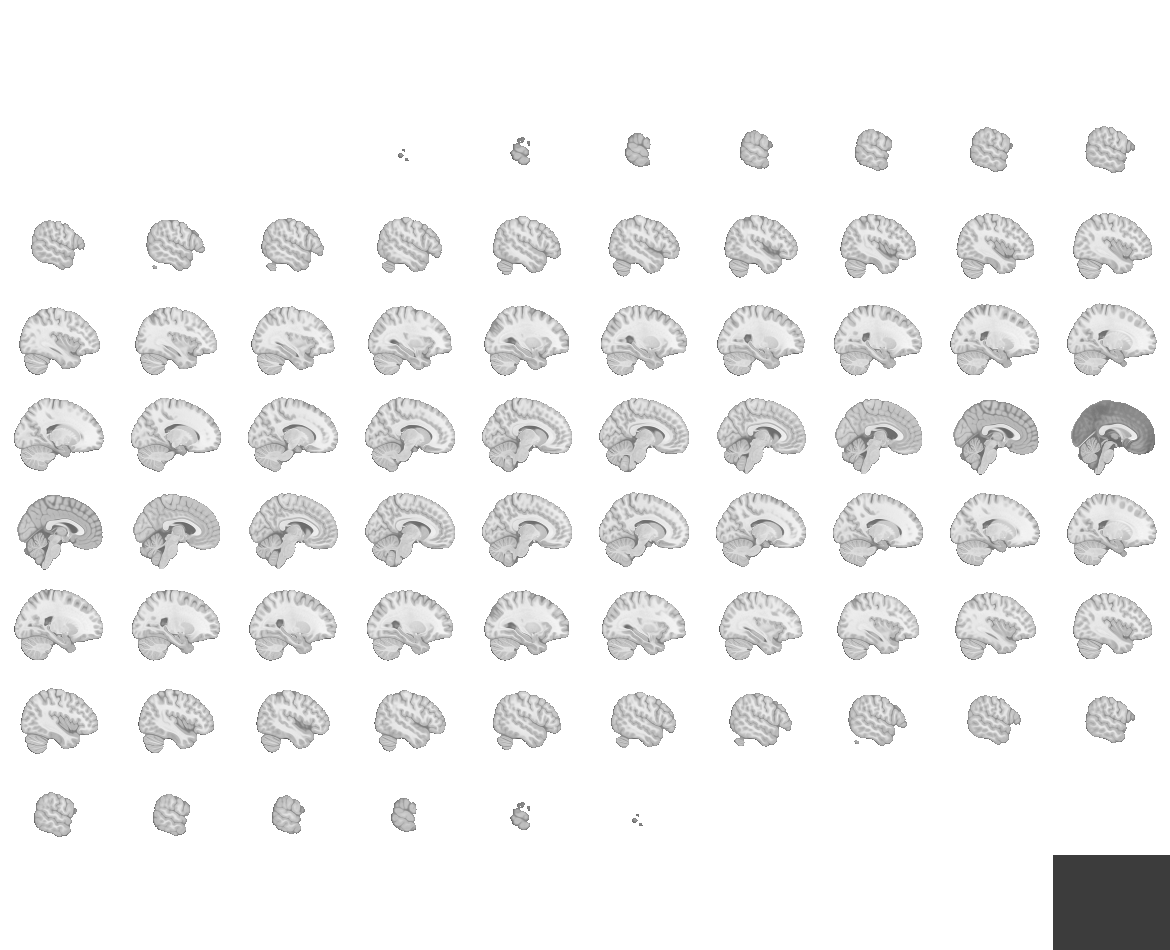
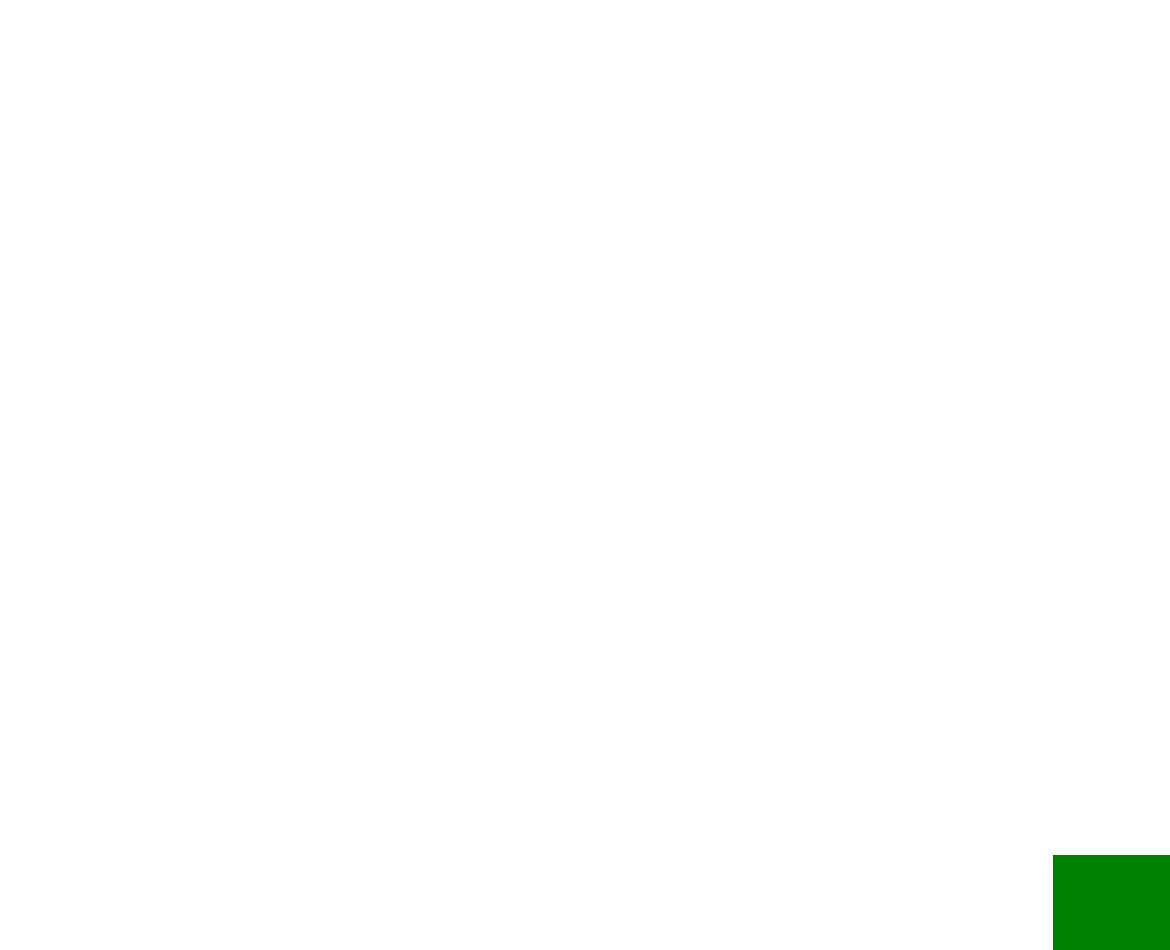

In [261]:
calvin_fwe.corrected_img

Visualize the P-Values (FWE Corrected) Used to Correct the Above


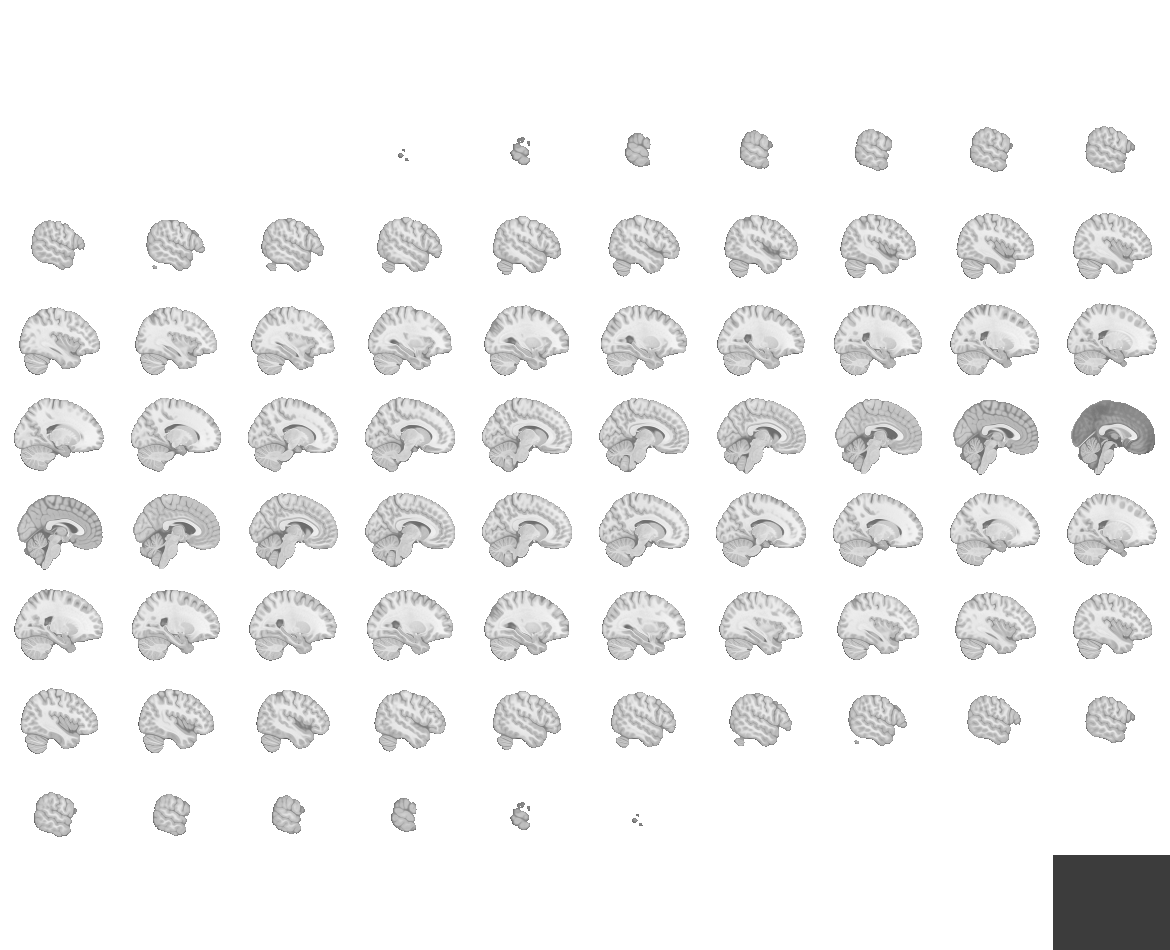
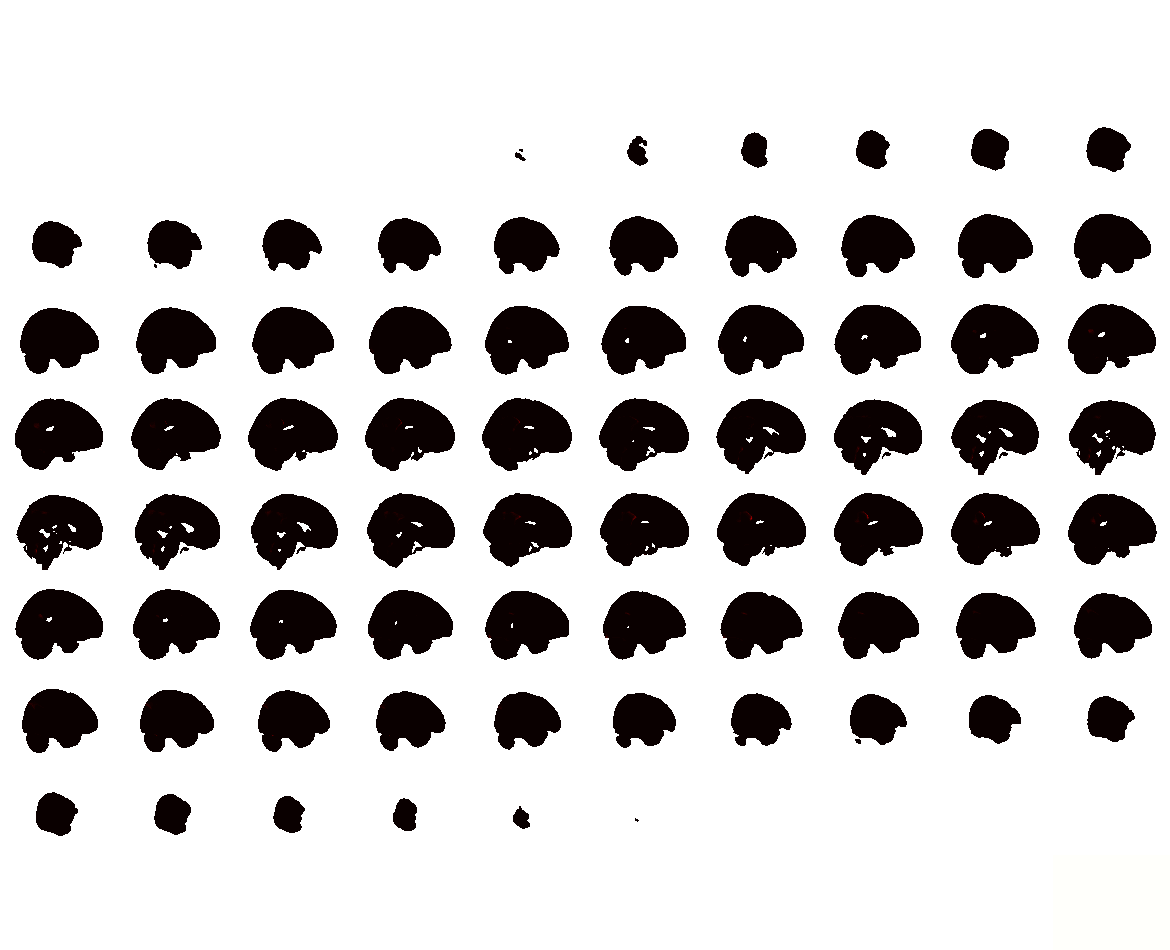

In [262]:
calvin_fwe.p_img

Visualize the Uncorrected Image


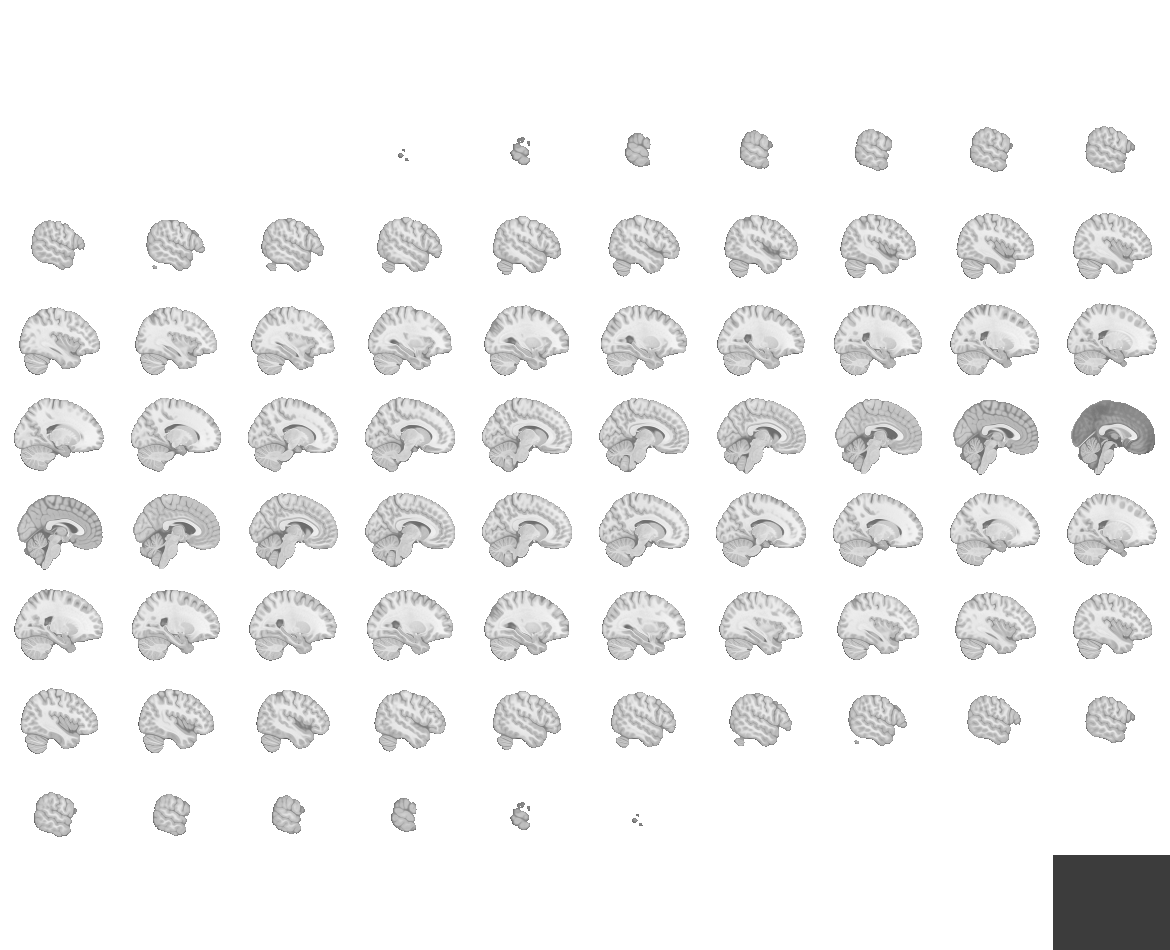
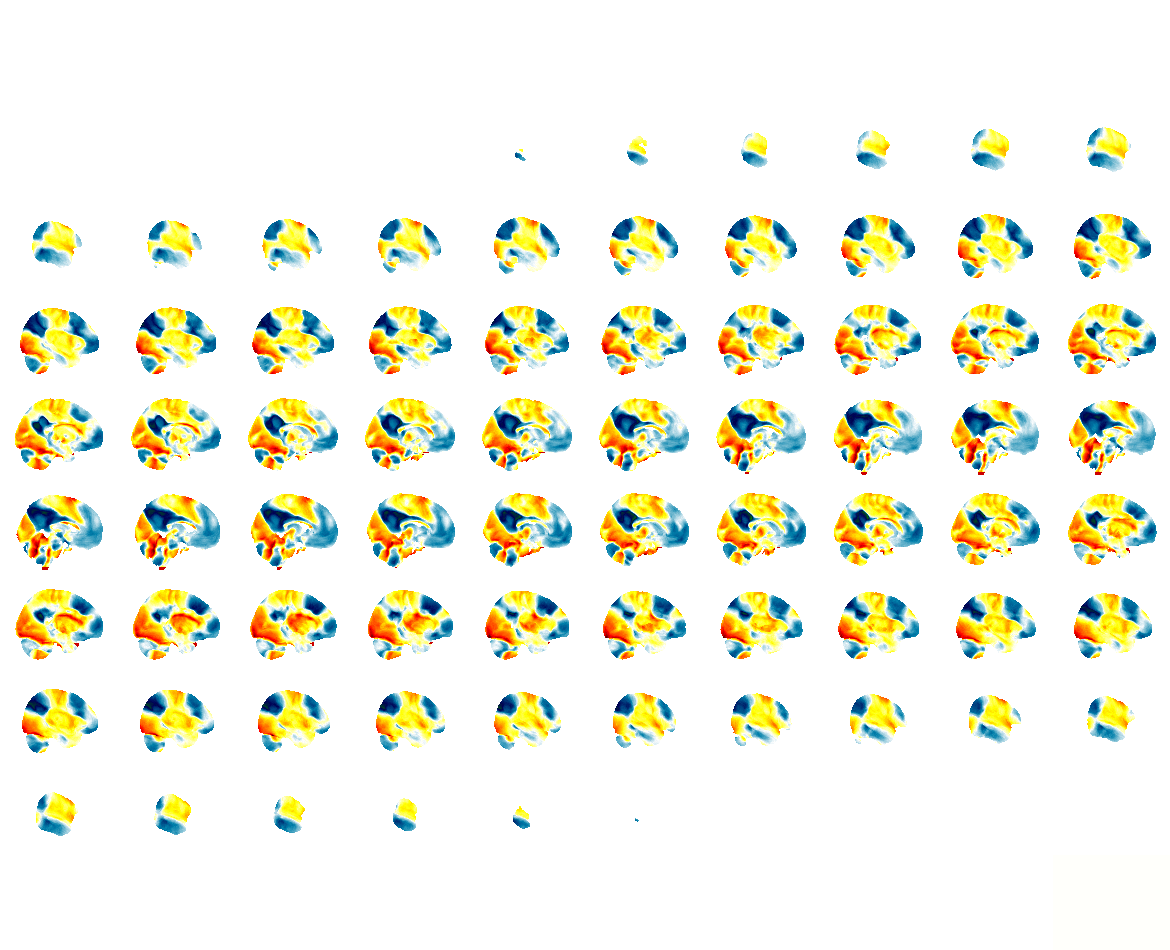

In [263]:
calvin_fwe.uncorrected_img